# Closest pairs

In this noteobok, we are going to test the different strategies for the problem of finding the closest pairs of points in a graph.

- The **brute force** approach: eveluation of all the pairs
- The **divide to conquer** aprroch: with a split of the graph on the x-axis

In [1]:
from inputs import InputListPointsXY as Points
from utils import euclidean_distance as d

(<Figure size 1332x1332 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11f58d050>)

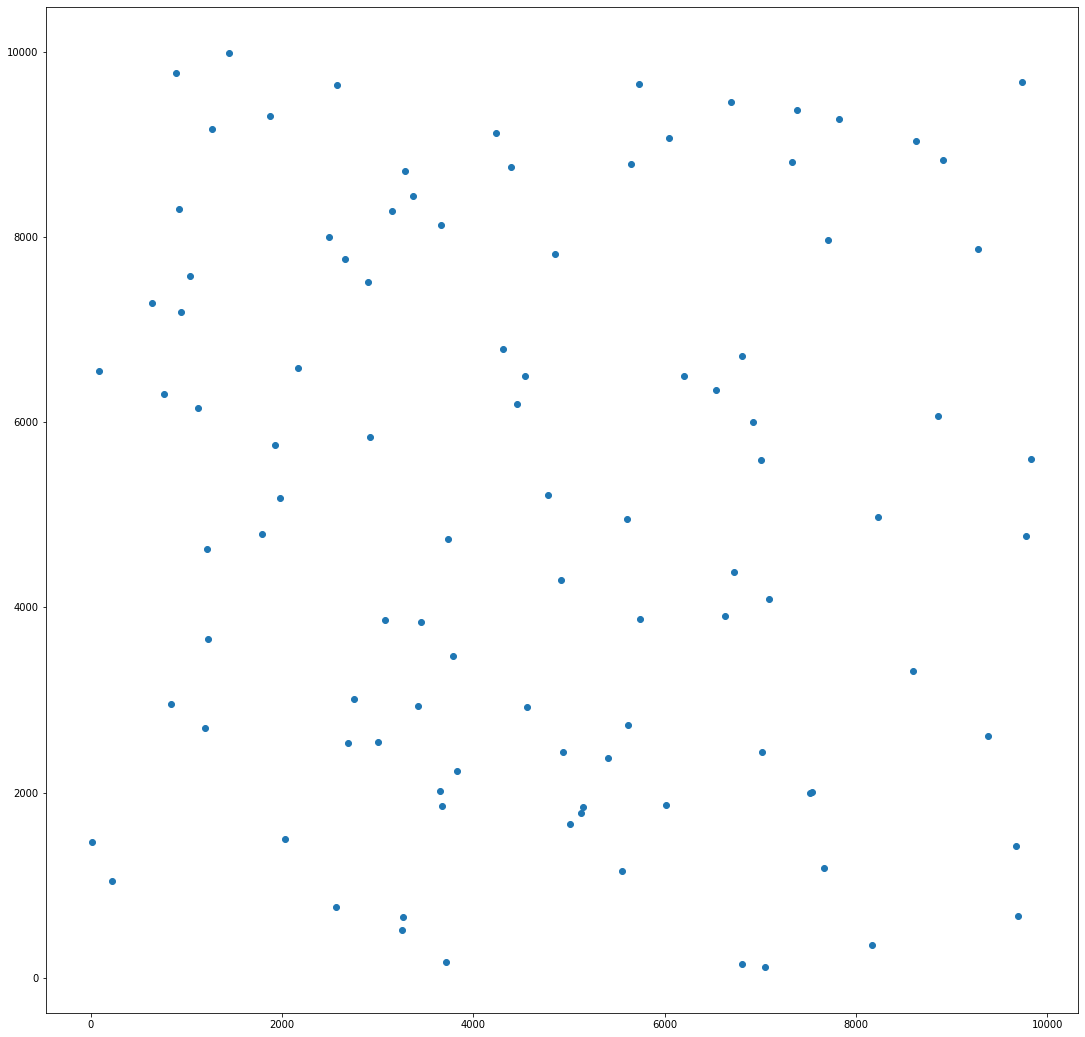

In [2]:
example_points = Points(l_length=100)
example_points.plot()

## Brute force

As mentionned in the README.md file, this approach compares every pairs of points to reevaluate the minimum

In [3]:
def brute_force_closest_pairs(input_points):
    # Initialize the closest pair as being the first two elements of input_list_pairs
    point_min1, point_min2, min_distance = 0, 1, d(input_points[0], input_points[1])
    for i, point1 in enumerate(input_points):
        for j, point2 in enumerate(input_points[i+1:], i+1):
            if d(point1, point2) < min_distance:
                point_min1, point_min2, min_distance = i, j, d(point1, point2)
                print(f'The minimal distance between the points is now {d(point1, point2)}')
    return point_min1, point_min2, min_distance

brute_force_closest_pairs(Points(l_length=1000))

The minimal distance between the points is now 2209.263451922382
The minimal distance between the points is now 1360.1150686614717
The minimal distance between the points is now 775.6713221461781
The minimal distance between the points is now 487.08315511830216
The minimal distance between the points is now 306.6153942645411
The minimal distance between the points is now 212.03773249117714
The minimal distance between the points is now 74.95331880577403
The minimal distance between the points is now 61.40032573203501
The minimal distance between the points is now 60.108235708594876
The minimal distance between the points is now 59.481089431852205
The minimal distance between the points is now 31.622776601683793
The minimal distance between the points is now 23.706539182259394
The minimal distance between the points is now 11.661903789690601


(229, 553, 11.661903789690601)

Note that the if statement is true around 10 times for a 1000-point long list, which is an indicator of the lack of performance of the algorithm. 
More precisely the nested loops have 1000 choose 2 = **499500** iterations.

Let's compute the indicator of performance as:
`nb of reeavaluations of the min / nb of itarations`

In [4]:
def brute_force_closest_pairs_performance(input_points):
    # Initialize the closest pair as being the first two elements of input_list_pairs
    point_min1, point_min2, min_distance = 0, 1, d(input_points[0], input_points[1])
    # Initialize the counters
    nb_itarations, nb_reevaluations_min = 0, 0
    for i, point1 in enumerate(input_points):
        for j, point2 in enumerate(input_points[i+1:], i+1):
            nb_itarations += 1
            if d(point1, point2) < min_distance:
                nb_reevaluations_min += 1
                point_min1, point_min2, min_distance = i, j, d(point1, point2)
    return round((nb_reevaluations_min / nb_itarations) * 100, 3)

print(f'The indicator of the performance of the algorithm could be: \n \
    {brute_force_closest_pairs_performance(Points(l_length=1000))} %')

The indicator of the performance of the algorithm could be: 
     0.003 %


You can run the previous cell several times and see that it stays under the 0.01%

Let's save a clean version of the brute force function in a.py file and import it

In [5]:
from closest_pair_algorithms.brute_force import brute_force_points as bf

## Visualize the solution

Let's draw a line between the two closet points to check if the solution looks correct

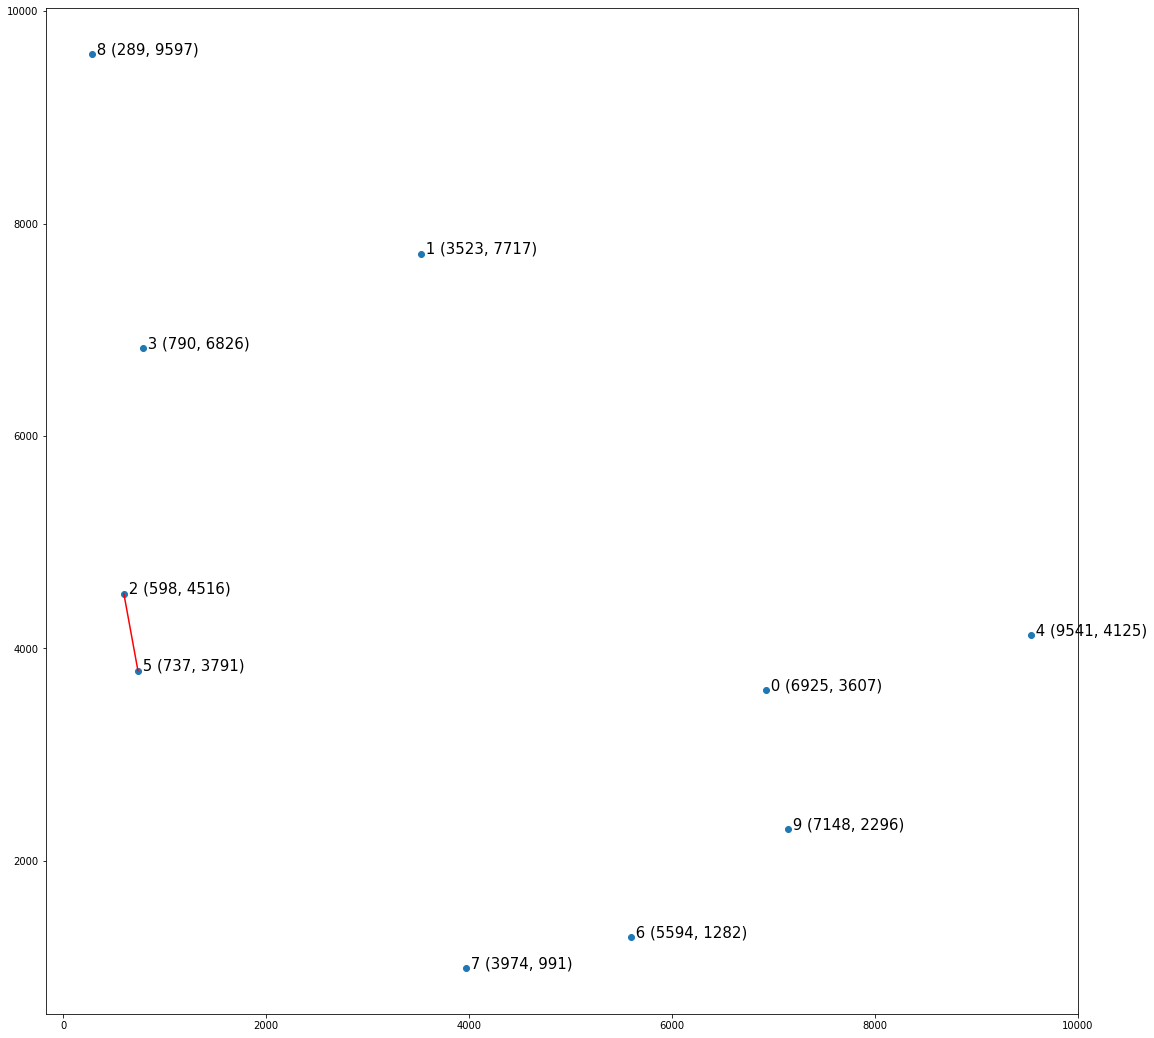

(<Figure size 1332x1332 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11ff7ff10>)

In [6]:
# Generate a set of 10 point
example_points = Points(l_length=10)
# Compute the solution
point1, point2 = bf(example_points)
# Draw the line and show the solution
example_points.plot_line_between(point1, point2, annotate=True)

## Divide to conquer approach

In [73]:
from time import sleep
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [84]:
P = Points(l_length=20)
fig, ax = P.plot()
print(fig)
plt.show()
clear_output(wait=True)
sleep(2)
ax.axvline(x=6000, linestyle='--', color='r')
print(fig)

fig.canvas.draw()

Figure(1332x1332)


In [72]:
from matplotlib import pyplot as plt
from IPython.display import clear_output
import numpy as np
for i in range(50):
    clear_output(wait=True)
    y = np.random.random([10,1])
    sleep(3)
    plt.plot(y)
    plt.show()

KeyboardInterrupt: 

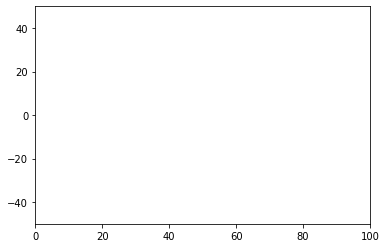

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [94]:
import matplotlib.pyplot as plt
import time
import random
 
ysample = random.sample(list(np.arange(-50, 50)), 100)
 
xdata = []
ydata = []
 
plt.show()
 
axes = plt.gca()
axes.set_xlim(0, 100)
axes.set_ylim(-50, +50)
line, = axes.plot(xdata, ydata, 'r-')
 
for i in range(100):
    xdata.append(i)
    ydata.append(ysample[i])
    line.set_xdata(xdata)
    line.set_ydata(ydata)
    plt.draw()
    plt.pause(1e-17)
    time.sleep(0.1)
 
# add this if you don't want the window to disappear at the end
plt.show()

In [93]:
np.arange(-50, 50)


array([-50, -49, -48, -47, -46, -45, -44, -43, -42, -41, -40, -39, -38,
       -37, -36, -35, -34, -33, -32, -31, -30, -29, -28, -27, -26, -25,
       -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12,
       -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,
         2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
        15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
        41,  42,  43,  44,  45,  46,  47,  48,  49])